<h1 align=center>第四章 4-1 大数据采集-BeautifulSoup</h1> 
<h1 align=center>基于豆瓣读书的爬虫实战</h1>

## 目录

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <li><a href="#ref0">课程导览</a></li>
    <li><a href="#ref1">爬虫准备</a></li>
    <li><a href="#ref2">编写爬虫代码</a></li>
    <li><a href="#ref10">开始爬取数据</a></li>
    <li><a href="#ref10">数据结果展示</a></li>
</div>

# 爬虫概述
在阅读这个样例之前，建议先了解爬虫是什么，简单理解url、爬虫技术、网页html等基本概念

## 1. 实验目标
爬取豆瓣读书中排名前250本书的信息。
https://book.douban.com/top250?start=0

## 2. 实验内容描述
在本次实验中，我们将来学习如何通过爬虫获取豆瓣读书网的前250排名的书籍。

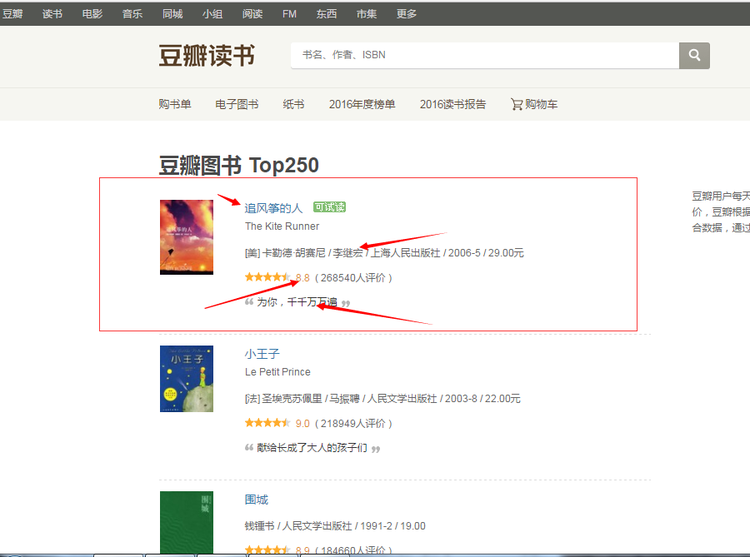

红色箭头标记的地方就是我们要获取的信息了，包括书的名字，作者和出版社信息，豆瓣评分和一句话简介。我们有了目标信息，就需要找到信息所在的页面源码，然后通过解析源码来获取到信息数据。那么，我们怎样获得页面 HTML 源代码呢？翻阅兵书，我们知道可以使用requests之计。代码实现如下

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
**代码示例：**
</div>

requests库是一个常用的用于http请求的模块，它使用python语言编写，可以方便的对网页进行爬取，是学习python爬虫的较好的http请求模块。

### 方法：requests库 + BeautifulSoup库

In [1]:
import requests
from fake_useragent import UserAgent  #引入虚假useragent
# import html5lib
headers = { "User-Agent": UserAgent(verify_ssl=False).random}  #伪装请求报头
# headers = { "User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36'}

In [2]:
resp = requests.get('https://book.douban.com/top250?start=0',headers=headers)
print(type(resp))   #Response对象包含爬虫返回的内容，包含服务器返回的所有信息，也包含请求的Request信息
print(resp.status_code)   #状态码为200时请求成功
print(resp.encoding)
# print(type(resp.text))
resp.text

<class 'requests.models.Response'>
200
utf-8


'\n\n<!DOCTYPE html>\n<html lang="zh-cmn-Hans" class="ua-windows ua-webkit book-new-nav">\n<head>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n  <title>豆瓣读书 Top 250</title>\n  \n<script>!function(e){var o=function(o,n,t){var c,i,r=new Date;n=n||30,t=t||"/",r.setTime(r.getTime()+24*n*60*60*1e3),c="; expires="+r.toGMTString();for(i in o)e.cookie=i+"="+o[i]+c+"; path="+t},n=function(o){var n,t,c,i=o+"=",r=e.cookie.split(";");for(t=0,c=r.length;t<c;t++)if(n=r[t].replace(/^\\s+|\\s+$/g,""),0==n.indexOf(i))return n.substring(i.length,n.length).replace(/\\"/g,"");return null},t=e.write,c={"douban.com":1,"douban.fm":1,"google.com":1,"google.cn":1,"googleapis.com":1,"gmaptiles.co.kr":1,"gstatic.com":1,"gstatic.cn":1,"google-analytics.com":1,"googleadservices.com":1},i=function(e,o){var n=new Image;n.onload=function(){},n.src="https://www.douban.com/j/except_report?kind=ra022&reason="+encodeURIComponent(e)+"&environment="+encodeURIComponent(o)},r=function(o){try{t.call

In [3]:
#法二:爬取网页的通用代码框架
def getHTMLText(url):     #获取网页源代码时调用
    try:
        r = requests.get(url,headers = headers)
        r.raise_for_status()  #如果状态不是200,引发HTTPError
        r.encoding = r.apparent_encoding
        print(resp.status_code)
        print(resp.encoding)
        print(type(resp))
#         print(type(resp.text))
        return r.text
    except:
        return "产生异常"
getHTMLText('https://book.douban.com/top250?start=0')

200
utf-8
<class 'requests.models.Response'>


'\n\n<!DOCTYPE html>\n<html lang="zh-cmn-Hans" class="ua-windows ua-webkit book-new-nav">\n<head>\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n  <title>豆瓣读书 Top 250</title>\n  \n<script>!function(e){var o=function(o,n,t){var c,i,r=new Date;n=n||30,t=t||"/",r.setTime(r.getTime()+24*n*60*60*1e3),c="; expires="+r.toGMTString();for(i in o)e.cookie=i+"="+o[i]+c+"; path="+t},n=function(o){var n,t,c,i=o+"=",r=e.cookie.split(";");for(t=0,c=r.length;t<c;t++)if(n=r[t].replace(/^\\s+|\\s+$/g,""),0==n.indexOf(i))return n.substring(i.length,n.length).replace(/\\"/g,"");return null},t=e.write,c={"douban.com":1,"douban.fm":1,"google.com":1,"google.cn":1,"googleapis.com":1,"gmaptiles.co.kr":1,"gstatic.com":1,"gstatic.cn":1,"google-analytics.com":1,"googleadservices.com":1},i=function(e,o){var n=new Image;n.onload=function(){},n.src="https://www.douban.com/j/except_report?kind=ra022&reason="+encodeURIComponent(e)+"&environment="+encodeURIComponent(o)},r=function(o){try{t.call

运行程序，我们就轻松的获得了敌军的 HTML 信息了。但是问题又来了，我们得到 HTML 信息后，怎样得到我们的目标数据呢？
我们打开浏览器，按f12到开发者工具，我们从网页源码里查找到数据位置，截图如下：

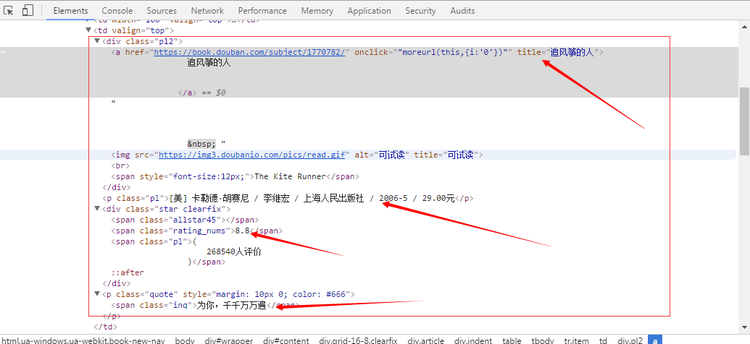

可以看到书名信息包含在class='pl2' div里面的a标签内，是a标签的title属性。发现目标位置后，就简单多了。我们利用BeautifulSoup来获得一个对象，按找标准的缩进显示的html代码：

In [4]:
#pip更新bs4包
!pip install bs4 --upgrade -i http://mirrors.aliyun.com/pypi/simple --trusted-host mirrors.aliyun.com

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
Requirement already up-to-date: bs4 in d:\python\lib\site-packages (0.0.1)


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


<div class="alert alert-success alertsuccess" style="margin-top: 10px">
**代码示例：**
</div>

In [5]:
from bs4 import BeautifulSoup
 
soup = BeautifulSoup(resp.text, 'lxml')

## 开始工作

现在我们要用到BeautifulSoup的find_all()选择器，因为我们这一页有很多书，而每一本书的信息都包含在class=pl2的div标签内，我们使用find_all()就可以直接得到本页所有书的书名了。我们用find()方法和find_all()方法来做一个比较

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
**代码示例：**
</div>

书名信息包含在class='pl2' div里面的a标签内，是a标签的title属性。

In [6]:
# find_all()方法，
# 注意class是Python关键词，后面要加下划线_：
alldiv = soup.find_all('div', class_='pl2')
for a in alldiv:
    names = a.find('a')['title']
    print('find_all():', names)
    
# find()方法：
alldiv2 = soup.find('div', class_='pl2')
names2 = alldiv2.find('a')['title']
print('find():', names2 )

find_all(): 红楼梦
find_all(): 活着
find_all(): 百年孤独
find_all(): 1984
find_all(): 飘
find_all(): 三体全集
find_all(): 三国演义（全二册）
find_all(): 白夜行
find_all(): 福尔摩斯探案全集（上中下）
find_all(): 房思琪的初恋乐园
find_all(): 动物农场
find_all(): 小王子
find_all(): 天龙八部
find_all(): 撒哈拉的故事
find_all(): 安徒生童话故事集
find_all(): 哈利•波特
find_all(): 人类简史
find_all(): 围城
find_all(): 沉默的大多数
find_all(): 平凡的世界（全三部）
find_all(): 霍乱时期的爱情
find_all(): 明朝那些事儿（1-9）
find_all(): 局外人
find_all(): 杀死一只知更鸟
find_all(): 笑傲江湖（全四册）
find(): 红楼梦


我们通过结果就可以看到两者之间的差距了，前者输出了一页的数据，而后者只输出了第一条数据。所以包括后面的信息，由于每一条数据所在标签是一样的，我们都是用find_all()方法。

上面的代码写的优雅点，就是这样实现,注意结果是一个 list：

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
**代码示例：**
</div>

In [7]:
# 书名, 注意是L小写，不是阿拉伯数字1
alldiv = soup.find_all('div', class_='pl2')
names = [a.find('a')['title'] for a in alldiv]
names

['红楼梦',
 '活着',
 '百年孤独',
 '1984',
 '飘',
 '三体全集',
 '三国演义（全二册）',
 '白夜行',
 '福尔摩斯探案全集（上中下）',
 '房思琪的初恋乐园',
 '动物农场',
 '小王子',
 '天龙八部',
 '撒哈拉的故事',
 '安徒生童话故事集',
 '哈利•波特',
 '人类简史',
 '围城',
 '沉默的大多数',
 '平凡的世界（全三部）',
 '霍乱时期的爱情',
 '明朝那些事儿（1-9）',
 '局外人',
 '杀死一只知更鸟',
 '笑傲江湖（全四册）']

这样书名数据我们就得到了，接下来是作者信息。方法和获取书名方法一样：

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
**代码示例：**
</div>

In [8]:
# 作者,由于信息在一个p标签内部，class=pl
# 我们获取到标签直接get_text()方法获得文本内容
allp = soup.find_all('p', class_='pl')
authors = [p.get_text() for p in allp]
authors

['[清] 曹雪芹 著 / 人民文学出版社 / 1996-12 / 59.70元',
 '余华 / 作家出版社 / 2012-8-1 / 20.00元',
 '[哥伦比亚] 加西亚·马尔克斯 / 范晔 / 南海出版公司 / 2011-6 / 39.50元',
 '[英] 乔治·奥威尔 / 刘绍铭 / 北京十月文艺出版社 / 2010-4-1 / 28.00',
 '[美国] 玛格丽特·米切尔 / 李美华 / 译林出版社 / 2000-9 / 40.00元',
 '刘慈欣 / 重庆出版社 / 2012-1-1 / 168.00元',
 '[明] 罗贯中 / 人民文学出版社 / 1998-05 / 39.50元',
 '[日] 东野圭吾 / 刘姿君 / 南海出版公司 / 2013-1-1 / 39.50元',
 '[英] 阿·柯南道尔 / 丁钟华 等 / 群众出版社 / 1981-8 / 53.00元/68.00元',
 '林奕含 / 北京联合出版公司 / 2018-1 / 45.00元',
 '[英] 乔治·奥威尔 / 荣如德 / 上海译文出版社 / 2007-3 / 10.00元',
 '[法] 圣埃克苏佩里 / 马振聘 / 人民文学出版社 / 2003-8 / 22.00元',
 '金庸 / 生活.读书.新知三联书店 / 1994-5 / 96.0',
 '三毛 / 哈尔滨出版社 / 2003-8 / 15.80元',
 '（丹麦）安徒生 / 叶君健 / 人民文学出版社 / 1997-08 / 25.00元',
 'J.K.罗琳 (J.K.Rowling) / 人民文学出版社 / 2008-12-1 / 498.00元',
 '[以色列] 尤瓦尔·赫拉利 / 林俊宏 / 中信出版社 / 2014-11 / CNY 68.00',
 '钱锺书 / 人民文学出版社 / 1991-2 / 19.00',
 '王小波 / 中国青年出版社 / 1997-10 / 27.00元',
 '路遥 / 人民文学出版社 / 2005-1 / 64.00元',
 '[哥伦比亚] 加西亚·马尔克斯 / 杨玲 / 南海出版公司 / 2012-9-1 / 39.50元',
 '当年明月 / 中国海关出版社 / 2009-4 / 358.20元',
 '[法] 阿尔贝·加缪 / 柳鸣九 / 上

后面的评分内容和简介内容也是一样获得，只是标签不同，但是方法一样，具体也不需要多余赘述。直接看实现代码：

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
**代码示例：**
</div>

In [9]:
# 评分
starspan = soup.find_all('span', class_='rating_nums')
scores = [s.get_text() for s in starspan]
scores

['9.6',
 '9.4',
 '9.2',
 '9.3',
 '9.3',
 '9.4',
 '9.3',
 '9.1',
 '9.2',
 '9.2',
 '9.2',
 '9.0',
 '9.1',
 '9.2',
 '9.2',
 '9.7',
 '9.1',
 '8.9',
 '9.1',
 '9.0',
 '9.0',
 '9.1',
 '9.0',
 '9.2',
 '9.0']

In [10]:
# 简介
sumspan = soup.find_all('span', class_='inq')
sums = [i.get_text() for i in sumspan]
sums

['都云作者痴，谁解其中味？',
 '生的苦难与伟大',
 '魔幻现实主义文学代表作',
 '栗树荫下，我出卖你，你出卖我',
 '革命时期的爱情，随风而逝',
 '地球往事三部曲',
 '是非成败转头空',
 '一宗离奇命案牵出跨度近20年步步惊心的故事',
 '名侦探的代名词',
 '向死而生的文学绝唱',
 '太阳底下并无新事',
 '献给长成了大人的孩子们',
 '有情皆孽，无人不冤',
 '游荡的自由灵魂',
 '为了争取未来的一代',
 '从9¾站台开始的旅程',
 '跟着人类一同走过十万年',
 '幽默的语言和对生活深刻的观察',
 '沉默是沉默者的通行证',
 '中国当代城乡生活全景',
 '义无反顾地直达爱情的核心',
 '不拘一格的历史书写',
 '人生在世，永远也不该演戏作假',
 '有一种东西不能遵循从众原则，那就是——人的良心',
 '欲练此功，必先自宫']

程序运行成功，我们就获得了4个list，分别是书名，作者，评分和简介内容。我们要把他们放在一起，打印出来，就是一页的数据信息了。
这里我们使用zip()函数，zip()函数在运算时，会以一个或多个序列做为参数，返回一个元组的列表。同时将这些序列中并排的元素配对。

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
**代码示例：**
</div>

In [11]:
for name, author, score, sum in zip(names, authors, scores, sums):
    name = '书名：' + str(name) + '\n'
    author = '作者：' + str(author) + '\n'
    score = '评分：' + str(score) + '\n'
    sum = '简介：' + str(sum) + '\n'
    data = name + author + score + sum
    print(data)

书名：红楼梦
作者：[清] 曹雪芹 著 / 人民文学出版社 / 1996-12 / 59.70元
评分：9.6
简介：都云作者痴，谁解其中味？

书名：活着
作者：余华 / 作家出版社 / 2012-8-1 / 20.00元
评分：9.4
简介：生的苦难与伟大

书名：百年孤独
作者：[哥伦比亚] 加西亚·马尔克斯 / 范晔 / 南海出版公司 / 2011-6 / 39.50元
评分：9.2
简介：魔幻现实主义文学代表作

书名：1984
作者：[英] 乔治·奥威尔 / 刘绍铭 / 北京十月文艺出版社 / 2010-4-1 / 28.00
评分：9.3
简介：栗树荫下，我出卖你，你出卖我

书名：飘
作者：[美国] 玛格丽特·米切尔 / 李美华 / 译林出版社 / 2000-9 / 40.00元
评分：9.3
简介：革命时期的爱情，随风而逝

书名：三体全集
作者：刘慈欣 / 重庆出版社 / 2012-1-1 / 168.00元
评分：9.4
简介：地球往事三部曲

书名：三国演义（全二册）
作者：[明] 罗贯中 / 人民文学出版社 / 1998-05 / 39.50元
评分：9.3
简介：是非成败转头空

书名：白夜行
作者：[日] 东野圭吾 / 刘姿君 / 南海出版公司 / 2013-1-1 / 39.50元
评分：9.1
简介：一宗离奇命案牵出跨度近20年步步惊心的故事

书名：福尔摩斯探案全集（上中下）
作者：[英] 阿·柯南道尔 / 丁钟华 等 / 群众出版社 / 1981-8 / 53.00元/68.00元
评分：9.2
简介：名侦探的代名词

书名：房思琪的初恋乐园
作者：林奕含 / 北京联合出版公司 / 2018-1 / 45.00元
评分：9.2
简介：向死而生的文学绝唱

书名：动物农场
作者：[英] 乔治·奥威尔 / 荣如德 / 上海译文出版社 / 2007-3 / 10.00元
评分：9.2
简介：太阳底下并无新事

书名：小王子
作者：[法] 圣埃克苏佩里 / 马振聘 / 人民文学出版社 / 2003-8 / 22.00元
评分：9.0
简介：献给长成了大人的孩子们

书名：天龙八部
作者：金庸 / 生活.读书.新知三联书店 / 1994-5 / 96.0
评分：9.1
简介：有情皆孽，无人不冤

书名：撒哈拉的故事
作者：三毛 / 哈尔滨

我们使用换行符’\n‘给数据信息一点整齐的样式。我们可以查看到打印的结果，并没有所有数据黏在一起，显得丑陋。
获得信息后，就是保存数据了。保存数据也很简单，Python的文件读写操作就可以实现。代码如下：

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
**代码示例：**
</div>

In [12]:
# 文件名
filename = '豆瓣图书Top250.txt'
# 保存文件操作
with open(filename, 'w', encoding='utf-8') as f:
    # 保存数据
    f.writelines(data + '=======================' + '\n')
print('保存成功')

保存成功


但是，我们要的是 250 条数据，而不是一页的十几条数据，那么要怎么获得到所有的数据呢。我们可以检查页面的信息，可以看到页面一共 10 页，第一页的URL是https://book.douban.com/top250?start=0。而最后一页的 URL 是https://book.douban.com/top250?start=225
我们接着多看几页，第二页是https://book.douban.com/top250?start=25，第三页是https://book.douban.com/top250?start=50。

规律已经很清晰了，我们的页面的页数信息是最后的start=后面的数字。而且数字从0开始到225，每一页数字加 25.这就很简单了，我们以https://book.douban.com/top250?start=为基层URL，每一页在后面加页面的页数数字。就可以得到所有的页面 url 了。再以for循环迭代每一个 url，使用上面获取数据的方法，获得所有的数据信息。

获取所有页面URL的代码如下：

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
**代码示例：**
</div>

In [13]:
#翻页
base_url = 'https://book.douban.com/top250?start='
urllist = []
# 从0到225，间隔25的数组
for page in range(0, 250, 25):
    allurl = base_url + str(page)
    print(allurl)
    urllist.append(allurl)

https://book.douban.com/top250?start=0
https://book.douban.com/top250?start=25
https://book.douban.com/top250?start=50
https://book.douban.com/top250?start=75
https://book.douban.com/top250?start=100
https://book.douban.com/top250?start=125
https://book.douban.com/top250?start=150
https://book.douban.com/top250?start=175
https://book.douban.com/top250?start=200
https://book.douban.com/top250?start=225


我们把它保存在list里面，好用作循环迭代。

## 代码

那么，所有的功能都实现了。现在，我们只要将所有的代码组合起来，就可以实现我们需要的所有功能了。
上代码：

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
**代码示例：**
</div>

In [14]:
# -*- coding:utf-8 -*-

import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent   #引入虚假useragent
 
# 发出请求获得HTML源码的函数
def get_html(url):
    # 伪装成浏览器访问
#     headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
    headers = { "User-Agent": UserAgent(verify_ssl=False).random}
    resp = requests.get(url, headers=headers).text     
 
    return resp
 
    
# 获得所有页面的函数
def all_page():
    base_url = 'https://book.douban.com/top250?start='   #这个url的response是HtmlResponse 类型的
    urllist = []
    # 从0到225，间隔25的数组
    for page in range(0, 250, 25):
        allurl = base_url + str(page)
        urllist.append(allurl)
 
    return  urllist
    
    
# 解析页面，获得数据信息
def html_parse():
    # 调用函数，for循环迭代出所有页面
    for url in all_page():
        # BeautifulSoup的解析
        soup = BeautifulSoup(get_html(url), 'lxml')
        # 书名
        alldiv = soup.find_all('div', class_='pl2')
        names = [a.find('a')['title'] for a in alldiv]
        # 作者
        allp = soup.find_all('p', class_='pl')
        authors = [p.get_text() for p in allp]
        # 评分
        starspan = soup.find_all('span', class_='rating_nums')
        scores = [s.get_text() for s in starspan]
        # 简介
        sumspan = soup.find_all('span', class_='inq')
        sums = [i.get_text() for i in sumspan]
        
        for name, author, score, sum in zip(names, authors, scores, sums):
            name = '书名：' + str(name) + '\n'
            author = '作者：' + str(author) + '\n'
            score = '评分：' + str(score) + '\n'
            sum = '简介：' + str(sum) + '\n'
            data = name + author + score + sum
            # 保存数据
            f.writelines(data + '=======================' + '\n')

 
# 文件名
filename = '豆瓣图书Top250.txt'
# 保存文件操作
f = open(filename, 'w', encoding='utf-8')
# 调用函数
html_parse()
f.close()
print('保存成功。')

保存成功。


接下来，我们读取刚才爬取下来的文本信息，并打印它。

<div class="alert alert-success alertsuccess" style="margin-top: 10px">
**代码示例：**
</div>

In [15]:
file_object = open('豆瓣图书Top250.txt','r',encoding='UTF-8') 
lines=file_object.readlines()
lines

['书名：红楼梦\n',
 '作者：[清] 曹雪芹 著 / 人民文学出版社 / 1996-12 / 59.70元\n',
 '评分：9.6\n',
 '简介：都云作者痴，谁解其中味？\n',
 '=======================\n',
 '书名：活着\n',
 '作者：余华 / 作家出版社 / 2012-8-1 / 20.00元\n',
 '评分：9.4\n',
 '简介：生的苦难与伟大\n',
 '=======================\n',
 '书名：百年孤独\n',
 '作者：[哥伦比亚] 加西亚·马尔克斯 / 范晔 / 南海出版公司 / 2011-6 / 39.50元\n',
 '评分：9.2\n',
 '简介：魔幻现实主义文学代表作\n',
 '=======================\n',
 '书名：1984\n',
 '作者：[英] 乔治·奥威尔 / 刘绍铭 / 北京十月文艺出版社 / 2010-4-1 / 28.00\n',
 '评分：9.3\n',
 '简介：栗树荫下，我出卖你，你出卖我\n',
 '=======================\n',
 '书名：飘\n',
 '作者：[美国] 玛格丽特·米切尔 / 李美华 / 译林出版社 / 2000-9 / 40.00元\n',
 '评分：9.3\n',
 '简介：革命时期的爱情，随风而逝\n',
 '=======================\n',
 '书名：三体全集\n',
 '作者：刘慈欣 / 重庆出版社 / 2012-1-1 / 168.00元\n',
 '评分：9.4\n',
 '简介：地球往事三部曲\n',
 '=======================\n',
 '书名：三国演义（全二册）\n',
 '作者：[明] 罗贯中 / 人民文学出版社 / 1998-05 / 39.50元\n',
 '评分：9.3\n',
 '简介：是非成败转头空\n',
 '=======================\n',
 '书名：白夜行\n',
 '作者：[日] 东野圭吾 / 刘姿君 / 南海出版公司 / 2013-1-1 / 39.50元\n',
 '评分：9.1\n',
 '简介：一宗离奇命案牵出跨度近20年步步惊心的故事\n',
 '=====